# Notebook for Annotation of clusters of Magentic beads only - WITH OUTLIERS

**Created by :** Srivalli Kolla

**Created on :** 06 May, 2025

**Modified on :** 10 May,2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [23]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import anndata
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [24]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        25.1.0
attrs                       25.1.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.12
decorator                   5.2.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.13.0
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  8.1.5
isoduration               

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


# Data import - WITH OUTLIERS

In [25]:
with_outliers = sc.read_h5ad('./Github/Nuclear_hashing_2025/data/reannotated_manual_toppfun_batch_corrected_HTODemux_raw_10_05_25.h5ad')
with_outliers

AnnData object with n_obs × n_vars = 11900 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample_given', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Nuclei Purification Method after Hashing', 'assigned_hashtag', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden_0.2', 'leiden_0.5', 'cell_type', 'doublet_scores', 'predicted_doublets', 'leiden_1', 'leiden_0.1', 'leiden_0.3', 'manual_celltype_annotation_specific', 'manual_celltype_annotation_broad', 'toppfun_annotation'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Group_colors', 'HTO_classification_colors', 'Nuclei Purification Method after Has

# Annotation - Nuclei Purification Technique

In [26]:
mb_with_outliers = with_outliers[with_outliers.obs['Nuclei Purification Method after Hashing'] == 'Magnetic Beads'].copy()
mb_with_outliers

AnnData object with n_obs × n_vars = 7416 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample_given', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Nuclei Purification Method after Hashing', 'assigned_hashtag', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden_0.2', 'leiden_0.5', 'cell_type', 'doublet_scores', 'predicted_doublets', 'leiden_1', 'leiden_0.1', 'leiden_0.3', 'manual_celltype_annotation_specific', 'manual_celltype_annotation_broad', 'toppfun_annotation'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Group_colors', 'HTO_classification_colors', 'Nuclei Purification Method after Hash

In [27]:
features = [
    'Sex', 'Group', 'HTO_classification', 'assigned_hashtag',
    'Nuclei Purification Method after Hashing', 'total_counts',
    'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'doublet_scores'
]

for feature in features:
    ax = sc.pl.umap(
        mb_with_outliers,
        color=feature,
        frameon=False,
        layer='cpm_normalization',
        cmap='RdYlBu_r',
        show=False, legend_loc='right margin' 
    )
    
    fig = plt.gcf()

    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    safe_name = feature.replace(" ", "_").replace("/", "_")
    plt.savefig(
        f"./Github/Nuclear_hashing_2025/figs_bbknn_batch_effect_removed/umap_mag_beads_{safe_name}.png",
        dpi=300,
        transparent=True,
        facecolor='none',
        edgecolor='none'
    )
    plt.close()

## Marker Genes

In [28]:
marker_genes = {'Ventricular Cardiomyocytes' : ['Myh7',' Myl2',' Fhl2'],
 'Atrial Cardiomyocytes' :['Nppa',' Myl7',' Myl4'],
 'Fibroblasts': ['Dcn',' Gsn',' Pdgfra'],
 'Endothelial Cells' :['Vwf',' Pecam1',' Cdh5'],
 'Pericytes' :['Rgs5',' Abcc9',' Kcnj8'],
 'Smooth Muscle Cells' :['Myh11',' Tagln',' Acta2'],
 'Myeloid Immune Cells' : ['Cd14',' C1qa',' Cd68'],
 'Lymphoid Immune Cells' :['Cd8a',' Il7r',' Cd40lg'],
 'Adipocytes' : ['Gpam',' Fasn',' Lep'],
 'Neuronal Cells' :['Plp1',' Nrxn1',' Nrxn3'],
 'Mesothelial Cells' :['Msln',' Wt1',' Bnc1']
}

In [29]:
marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in mb_with_outliers.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [30]:
for cell_type, genes in marker_genes.items():
    
    cleaned_genes = [g.strip() for g in genes if g.strip() in mb_with_outliers.var_names]

    if cleaned_genes:
        print(f"{cell_type.upper()}:\n  → Plotting: {', '.join(cleaned_genes)}\n")

        for gene in cleaned_genes:
            sc.pl.umap(
                mb_with_outliers,
                color=gene,
                vmin=0,
                vmax="p99",
                sort_order=False,
                frameon=False,
                cmap="RdYlBu_r",
                layer='cpm_normalization',
                show=False
            )
            safe_gene = gene.replace(" ", "_").replace("/", "_")
            plt.savefig(
                f"./Github/Nuclear_hashing_2025/figs_bbknn_batch_effect_removed/mag_beads_{cell_type}_{safe_gene}.png",
                dpi=300,
                transparent=True,
                facecolor='none',
                edgecolor='none'
            )
            plt.close()

    else:
        print(f"{cell_type.upper()}:\n  ✗ No valid marker genes found in mb_with_outliers.var_names.\n")

    print("\n" + "-"*60 + "\n")

VENTRICULAR CARDIOMYOCYTES:
  → Plotting: Myh7, Myl2, Fhl2


------------------------------------------------------------

ATRIAL CARDIOMYOCYTES:
  → Plotting: Nppa, Myl7, Myl4




------------------------------------------------------------

FIBROBLASTS:
  → Plotting: Dcn, Gsn, Pdgfra


------------------------------------------------------------

ENDOTHELIAL CELLS:
  → Plotting: Vwf, Pecam1, Cdh5


------------------------------------------------------------

PERICYTES:
  → Plotting: Rgs5, Abcc9, Kcnj8


------------------------------------------------------------

SMOOTH MUSCLE CELLS:
  → Plotting: Myh11, Tagln, Acta2


------------------------------------------------------------

MYELOID IMMUNE CELLS:
  → Plotting: Cd14, C1qa, Cd68


------------------------------------------------------------

LYMPHOID IMMUNE CELLS:
  → Plotting: Cd8a, Il7r, Cd40lg


------------------------------------------------------------

ADIPOCYTES:
  → Plotting: Gpam, Fasn, Lep


------------------------------------------------------------

NEURONAL CELLS:
  → Plotting: Plp1, Nrxn1, Nrxn3


------------------------------------------------------------

MESOTHELIAL CELLS:
  → Plotting

## Leiden Clustering

In [31]:
sc.tl.leiden(mb_with_outliers, resolution=1, key_added="leiden_1")

running Leiden clustering


    finished: found 39 clusters and added
    'leiden_1', the cluster labels (adata.obs, categorical) (0:00:01)


In [32]:
sc.tl.leiden(mb_with_outliers, resolution=0.1, key_added="leiden_0.1")

running Leiden clustering
    finished: found 20 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:01)


In [33]:
sc.tl.leiden(mb_with_outliers, resolution=0.2, key_added="leiden_0.2")

running Leiden clustering


    finished: found 25 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:01)


In [34]:
sc.tl.leiden(mb_with_outliers, resolution=0.3, key_added="leiden_0.3")

running Leiden clustering


    finished: found 28 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:01)


In [35]:
sc.tl.leiden(mb_with_outliers, resolution=0.5, key_added="leiden_0.5")

running Leiden clustering


    finished: found 31 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:01)


In [36]:
for leiden in ["leiden_0.1", "leiden_0.2", "leiden_0.3", "leiden_0.5", "leiden_1"]:
    sc.pl.umap(
        mb_with_outliers,
        color=leiden,
        frameon=False,
        legend_loc="on data",
        show=False
    )
    plt.savefig(
        f"./Github/Nuclear_hashing_2025/figs_bbknn_batch_effect_removed/umap_mag_beads_{leiden}.png",
        dpi=300,
        transparent=True,
        facecolor='none',
        edgecolor='none'
    )
    plt.close()

# Cluster Annotation

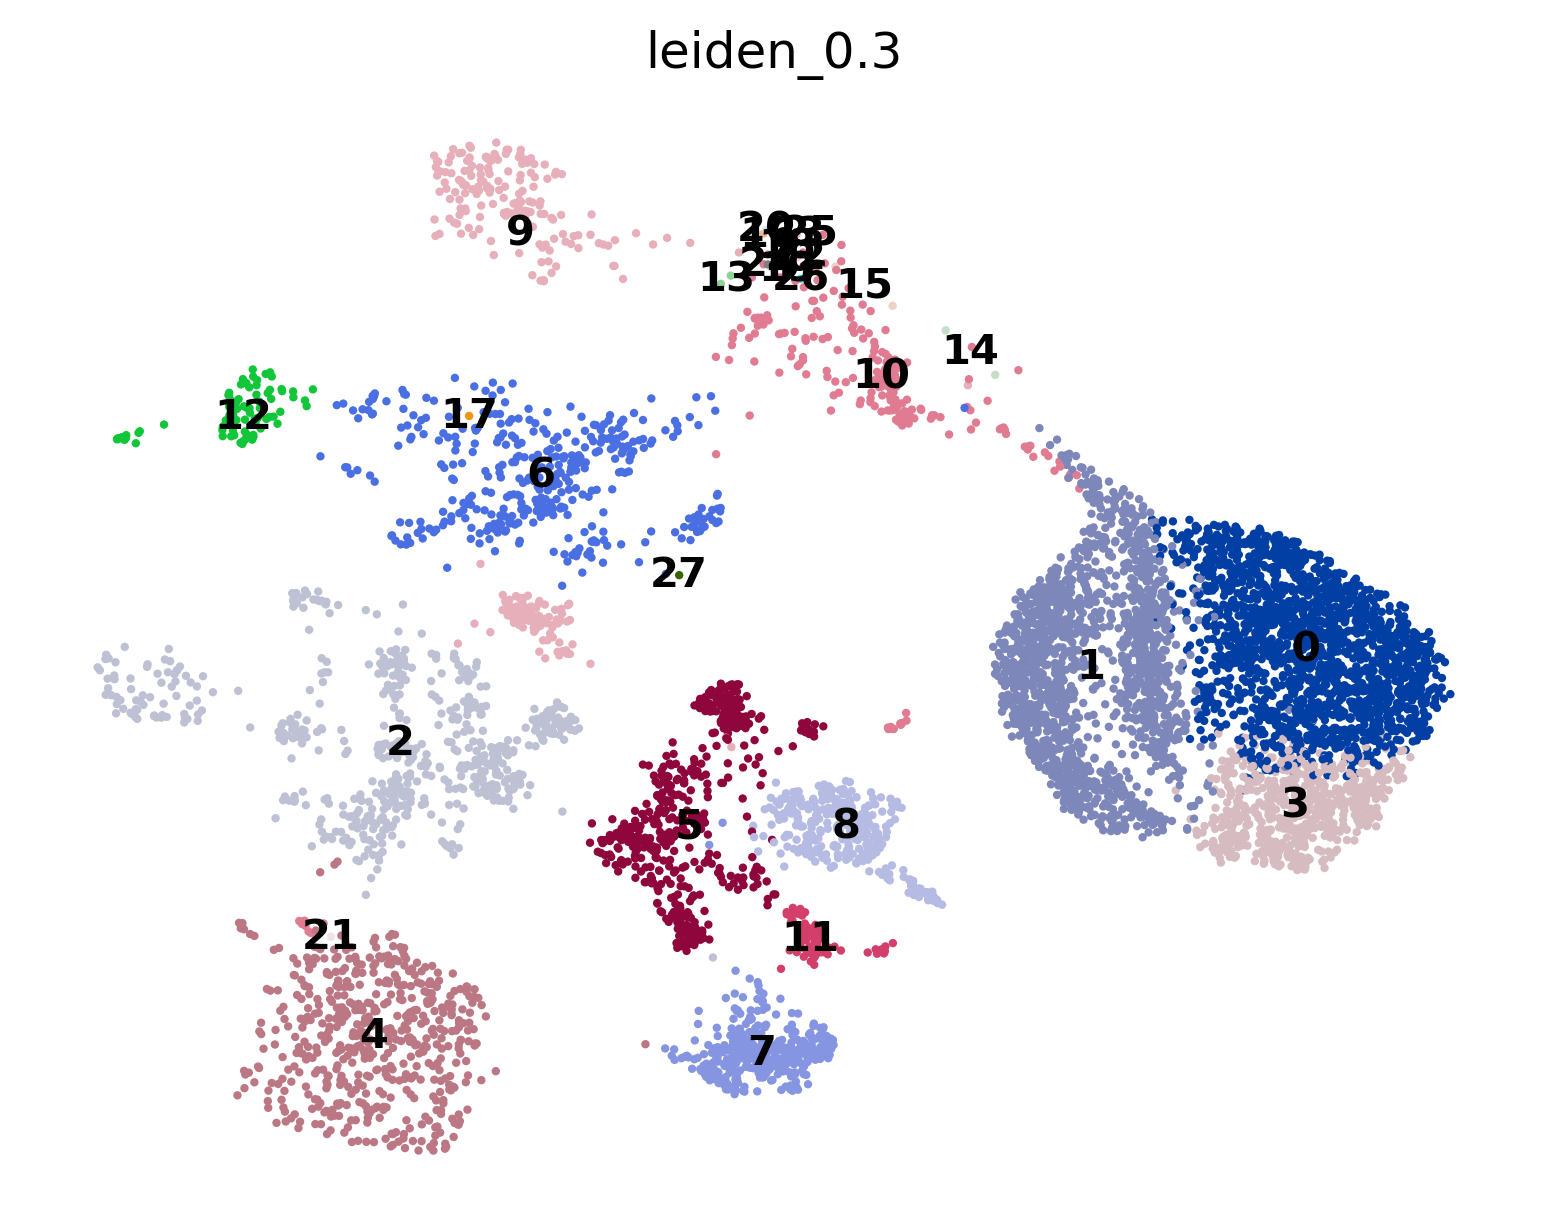

In [37]:
sc.pl.umap(mb_with_outliers, color = 'leiden_0.3',frameon= False, legend_loc = 'on data')

In [38]:
cl_annotation = {
"0" : "Venticular Cardiomyocytes",
"1" : "Venticular Cardiomyocytes",
"3" : "Atrial Cardiomyocytes",
"2" : "Fibroblasts",
"8" : "Fibroblasts + Adipocytes",
"12" : "Endothelial Cells",
"5" : "Endothelial Cells",
"4" : "Endothelial Cells + Pericytes + Neuronal Cells",
"10" : "Endothelial Cells + Lymphoid Immune Cells",
"6" : "Endothelial Cells + Pericytes + Adipocytes + Neuronal Cells",
"9" : "Endothelial Cells + Pericytes + Adipocytes",
"11" : "Pericytes + Neuronal Cells",
"13" : "Pericytes + Adipocytes",
"14" : "Smooth Muscle Cells",
"7" : "Atrial Cardiomyocytes + Myeloid Immune Cells + Fibroblasts"
}

In [39]:
mb_with_outliers.obs["manual_celltype_annotation_specific"] = mb_with_outliers.obs['leiden_0.3'].map(cl_annotation)

In [40]:
sc.pl.umap(
    mb_with_outliers,
    color=["manual_celltype_annotation_specific"],
    frameon=False,
    show=False, legend_loc='on data'
)
plt.savefig(
    "./Github/Nuclear_hashing_2025/figs_bbknn_batch_effect_removed/umap_mag_beads_manual_specific_anno.png",
    dpi=300,
    transparent=True,
    facecolor='none',
    edgecolor='none'
)
plt.close()

In [41]:
cl_annotation2 = {
"0" : "Venticular Cardiomyocytes",
"1" : "Venticular Cardiomyocytes",
"3" : "Venticular Cardiomyocytes",
"21" : "Fibroblasts",
"4" : "Fibroblasts",
"7" : "Fibroblasts",
"2" : "Endothelial Cells",
"5" : "Endothelial Cells",
"9" : "Endothelial Cells",
"11" : "Periytes"

}

In [42]:
mb_with_outliers.obs["manual_celltype_annotation_broad"] = mb_with_outliers.obs['leiden_0.3'].map(cl_annotation2).fillna('Unclear')

In [43]:
sc.pl.umap(
    mb_with_outliers,
    color=["manual_celltype_annotation_broad"],
    frameon=False,
    show=False, legend_loc = 'on data'
)
plt.savefig(
    "./Github/Nuclear_hashing_2025/figs_bbknn_batch_effect_removed/umap_mag_beads_manual_broad_anno.png",
    dpi=300,
    transparent=True,
    facecolor='none',
    edgecolor='none'
)
plt.close()